<a href="https://colab.research.google.com/github/HariniMohan97/Session-3/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras  #install keras!
import keras

Using TensorFlow backend.


In [0]:
#import all packages and dataset 
import numpy as np 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #split data into train and test

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


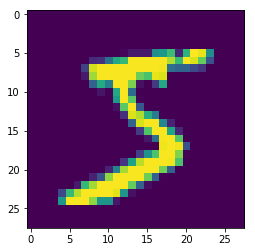

In [4]:
#plot first sample in train set
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#get proper dimension for all samples by reshaping 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#normalise data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
#print first 10 labels of train set
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
#print first 10 labels of train set after encoding
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26 #rf=3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(18,3,3, activation='relu')) #24 #rf=5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #12 #rf=10

model.add(Convolution2D(22,3,3, activation='relu')) #10 #rf=12
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32,1,1, activation='relu')) #10 #rf=12

model.add(MaxPooling2D(pool_size=(2, 2))) #5 #rf=24

model.add(Convolution2D(24,3,3, activation='relu')) #3 #rf=26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16,3,3, activation='relu')) #1 #rf=28
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1)) #1 #rf=28
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0811 16:42:16.010261 140577962334080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0811 16:42:16.082056 140577962334080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  if __

In [24]:
model.summary() #view full model 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 18)        2610      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 18)        72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 18)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 18)        0         
__________

In [0]:
#creates model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [26]:
# change learning rate according to the epoch. have low learning rate as we go close to the minima. 
# print validation accuracy for every epoch
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 23s 385us/step - loss: 0.4855 - acc: 0.8513 - val_loss: 0.0994 - val_acc: 0.9783
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 22s 361us/step - loss: 0.2741 - acc: 0.9113 - val_loss: 0.0495 - val_acc: 0.9884
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 21s 357us/step - loss: 0.2284 - acc: 0.9231 - val_loss: 0.0520 - val_acc: 0.9856
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 21s 356us/step - loss: 0.2055 - acc: 0.9302 - val_loss: 0.0371 - val_acc: 0.9902
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) #evaluate model

In [28]:
print(score) #print score

[0.020278797505330293, 0.9949]


In [0]:
model.save('model_9949.h5') #save model in file 

In [0]:
y_pred = model.predict(X_test) #get predicted values

In [31]:
print(y_pred[:9]) #print both pred and actual values
print(y_test[:9])

[[3.22602828e-05 7.42927805e-05 1.19885721e-04 5.49431934e-05
  5.17816916e-05 3.57769131e-05 6.17092326e-07 9.99568164e-01
  2.72707493e-05 3.50884729e-05]
 [5.74976330e-05 1.06962972e-04 9.99531388e-01 2.54947663e-05
  1.88561189e-05 4.71082302e-07 4.52938257e-05 1.24077327e-04
  6.26122710e-05 2.72912348e-05]
 [3.34160250e-05 9.99645948e-01 2.85831393e-05 3.58697907e-05
  1.30193193e-05 3.65112137e-05 3.00972752e-05 2.04250518e-05
  3.49832080e-05 1.21112404e-04]
 [9.99117911e-01 6.47093766e-05 9.68251625e-05 8.18007757e-05
  9.60463803e-05 7.80782284e-05 2.10943545e-04 5.69154217e-05
  4.27438608e-05 1.54000561e-04]
 [9.69708417e-05 7.77318928e-05 1.30434782e-04 1.55258953e-04
  9.98258293e-01 3.11559212e-04 1.19568409e-04 2.31571787e-04
  8.38002597e-05 5.34740975e-04]
 [6.01395332e-05 9.99606550e-01 3.27870075e-05 3.94338094e-05
  2.06533568e-05 3.12547745e-05 2.81151497e-05 3.37394340e-05
  4.59245493e-05 1.01332414e-04]
 [5.56665982e-05 1.03975188e-04 8.03991570e-05 7.28897357e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers]) #creates dictionary of all layers with its name

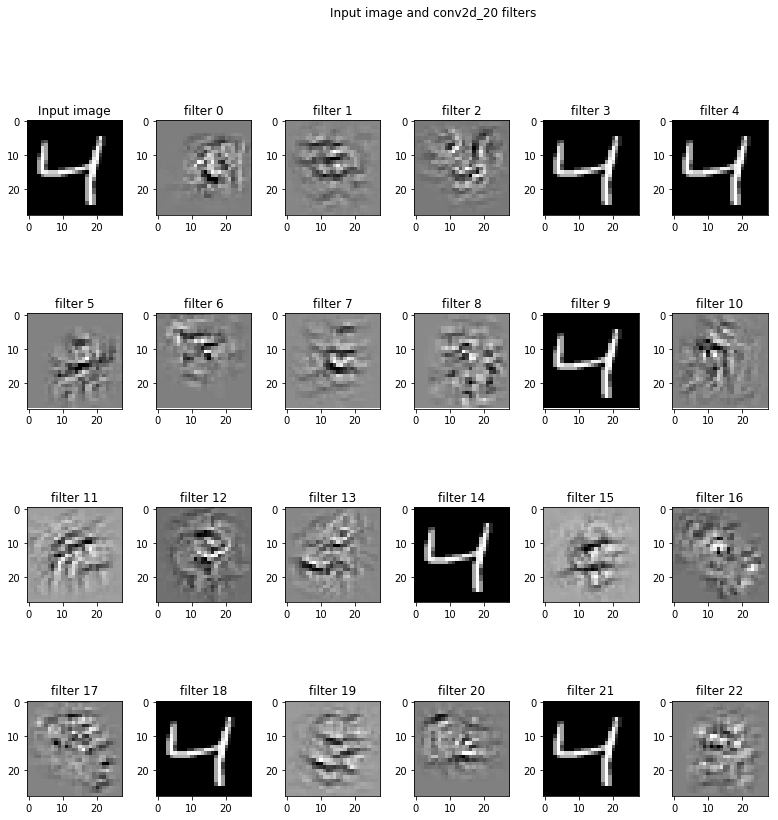

In [34]:
#print what the kernel extracts in each layer

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_20'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()